In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 1. Load dataset

# 3. Read from Excel
df = pd.read_excel("Final_Complete_cleaned.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7043 non-null   int64  
 1   CustomerID         7043 non-null   object 
 2   Count              7043 non-null   int64  
 3   Zip Code           7043 non-null   int64  
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   int64  
 7   Senior Citizen     7043 non-null   int64  
 8   Partner            7043 non-null   int64  
 9   Dependents         7043 non-null   int64  
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   int64  
 12  Multiple Lines     7043 non-null   int64  
 13  Internet Service   7043 non-null   int64  
 14  Online Security    7043 non-null   int64  
 15  Online Backup      7043 non-null   int64  
 16  Device Protection  7043 

In [3]:
import sys
print("🔴 THIS IS THE PYTHON PATH YOUR NOTEBOOK IS USING:")
print(sys.executable)

🔴 THIS IS THE PYTHON PATH YOUR NOTEBOOK IS USING:
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\python.exe


In [4]:
df=df.drop(columns=["Unnamed: 0","CustomerID","Count","Zip Code","Longitude","Latitude","LID"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   int64  
 7   Internet Service   7043 non-null   int64  
 8   Online Security    7043 non-null   int64  
 9   Online Backup      7043 non-null   int64  
 10  Device Protection  7043 non-null   int64  
 11  Tech Support       7043 non-null   int64  
 12  Streaming TV       7043 non-null   int64  
 13  Streaming Movies   7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Method     7043 

In [6]:
df.columns.to_list()

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Churn Reason']

In [7]:
corr_df=df.corr()
corr_df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
Gender,1.000000,-0.001874,-0.001808,0.005229,0.004358,-0.006488,-0.009451,0.000863,-0.014418,-0.012230,...,0.000126,-0.011754,0.017352,-0.014411,-0.001464,-0.008612,-0.008612,-0.000075,-0.008253,-0.006858
Senior Citizen,-0.001874,1.000000,0.016479,-0.174396,0.015145,0.008576,0.113791,0.032310,0.081878,0.144828,...,-0.142554,0.156530,-0.038551,0.221459,0.104159,0.150889,0.150889,0.103721,-0.003664,0.111995
Partner,-0.001808,0.016479,1.000000,0.363430,0.379339,0.017706,0.117307,-0.000891,0.091303,0.090753,...,0.294806,-0.014877,-0.154798,0.095333,0.319490,-0.150448,-0.150448,-0.111641,0.136707,-0.122765
Dependents,0.005229,-0.174396,0.363430,1.000000,0.134235,0.000625,-0.020852,-0.082993,-0.068180,-0.093810,...,0.202279,-0.118963,-0.025370,-0.145988,0.032060,-0.248542,-0.248542,-0.176473,0.058616,-0.198739
Tenure Months,0.004358,0.015145,0.379339,0.134235,1.000000,0.008063,0.257157,0.029952,0.231322,0.251292,...,0.673099,0.004306,-0.370216,0.238910,0.829384,-0.361571,-0.361571,-0.232904,0.393732,-0.292249
Phone Service,-0.006488,0.008576,0.017706,0.000625,0.008063,1.000000,0.675070,-0.387436,-0.159989,-0.129770,...,0.002247,0.016505,-0.004184,0.248224,0.112010,0.011942,0.011942,0.024492,0.023504,0.007126
Multiple Lines,-0.009451,0.113791,0.117307,-0.020852,0.257157,0.675070,1.000000,-0.186826,0.069085,0.130619,...,0.083343,0.133255,-0.133346,0.489319,0.411154,0.036310,0.036310,0.044839,0.112522,0.017689
Internet Service,0.000863,0.032310,-0.000891,-0.082993,0.029952,-0.387436,-0.186826,1.000000,0.720587,0.650962,...,-0.099721,0.138625,-0.086140,0.326713,0.184512,0.047291,0.047291,0.021590,0.004128,0.041115
Online Security,-0.014418,0.081878,0.091303,-0.068180,0.231322,-0.159989,0.069085,0.720587,1.000000,0.705166,...,0.015824,0.184993,-0.170629,0.634556,0.485965,0.023309,0.023309,0.008133,0.093664,0.017348
Online Backup,-0.012230,0.144828,0.090753,-0.093810,0.251292,-0.129770,0.130619,0.650962,0.705166,1.000000,...,-0.035407,0.260715,-0.181252,0.710142,0.539874,0.074205,0.074205,0.051313,0.093543,0.058345


In [8]:
l1=corr_df.columns.tolist()
l1


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Churn Reason']

In [9]:
columns=corr_df.columns.to_list()

In [10]:

def high_corr_dict(corr_df, columns, threshold):
    result = {}

    for col in columns:
        l = set()
        for col1 in columns:
            if col == col1:
                continue
            if (corr_df.loc[col, col1]) > threshold:
                l.add(col1)
        result[col] = l
    return result


In [11]:
high_corr_dict(corr_df,columns,0.9)

{'Gender': set(),
 'Senior Citizen': set(),
 'Partner': set(),
 'Dependents': set(),
 'Tenure Months': set(),
 'Phone Service': set(),
 'Multiple Lines': set(),
 'Internet Service': set(),
 'Online Security': set(),
 'Online Backup': set(),
 'Device Protection': set(),
 'Tech Support': set(),
 'Streaming TV': set(),
 'Streaming Movies': set(),
 'Contract': set(),
 'Paperless Billing': set(),
 'Payment Method': set(),
 'Monthly Charges': set(),
 'Total Charges': set(),
 'Churn Label': {'Churn Value'},
 'Churn Value': {'Churn Label'},
 'Churn Score': set(),
 'CLTV': set(),
 'Churn Reason': set()}

In [12]:
#hmm


In [13]:
high_corr_dict(corr_df,columns,0.8)

{'Gender': set(),
 'Senior Citizen': set(),
 'Partner': set(),
 'Dependents': set(),
 'Tenure Months': {'Total Charges'},
 'Phone Service': set(),
 'Multiple Lines': set(),
 'Internet Service': set(),
 'Online Security': set(),
 'Online Backup': set(),
 'Device Protection': set(),
 'Tech Support': set(),
 'Streaming TV': {'Monthly Charges', 'Streaming Movies'},
 'Streaming Movies': {'Monthly Charges', 'Streaming TV'},
 'Contract': set(),
 'Paperless Billing': set(),
 'Payment Method': set(),
 'Monthly Charges': {'Streaming Movies', 'Streaming TV'},
 'Total Charges': {'Tenure Months'},
 'Churn Label': {'Churn Reason', 'Churn Value'},
 'Churn Value': {'Churn Label', 'Churn Reason'},
 'Churn Score': set(),
 'CLTV': set(),
 'Churn Reason': {'Churn Label', 'Churn Value'}}

In [14]:
# here we see that  Tenure of months  increases when total charges increases
# then we see that  streaming tv increases monthly charges ,streaming tv increases
#churn label is there means churn reason is there churn value also ther


In [15]:
df=df.drop(columns=["Churn Value","Churn Reason","Tenure Months","Streaming Movies","Streaming TV"],axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Phone Service      7043 non-null   int64  
 5   Multiple Lines     7043 non-null   int64  
 6   Internet Service   7043 non-null   int64  
 7   Online Security    7043 non-null   int64  
 8   Online Backup      7043 non-null   int64  
 9   Device Protection  7043 non-null   int64  
 10  Tech Support       7043 non-null   int64  
 11  Contract           7043 non-null   int64  
 12  Paperless Billing  7043 non-null   int64  
 13  Payment Method     7043 non-null   int64  
 14  Monthly Charges    7043 non-null   float64
 15  Total Charges      7043 non-null   float64
 16  Churn Label        7043 

In [17]:
corr_df=df.corr()
columns = corr_df.columns.to_list()

In [18]:
high_corr_dict(corr_df,columns,0.8)

{'Gender': set(),
 'Senior Citizen': set(),
 'Partner': set(),
 'Dependents': set(),
 'Phone Service': set(),
 'Multiple Lines': set(),
 'Internet Service': set(),
 'Online Security': set(),
 'Online Backup': set(),
 'Device Protection': set(),
 'Tech Support': set(),
 'Contract': set(),
 'Paperless Billing': set(),
 'Payment Method': set(),
 'Monthly Charges': set(),
 'Total Charges': set(),
 'Churn Label': set(),
 'Churn Score': set(),
 'CLTV': set()}

In [19]:

def unn_corr_dict(corr_df, columns, threshold):
    result = {}

    for col in columns:
        l = set()
        for col1 in columns:
            if col == col1:
                continue
            if threshold>=0:
                if 0<=(corr_df.loc[col, col1]) <= threshold:
                    l.add(col1)
            else:
                if 0>=(corr_df.loc[col, col1]) >= threshold:
                    l.add(col1)

        result[col] = l
    return result


In [20]:
unn_corr_dict(corr_df,columns,0.001)

{'Gender': {'Contract', 'Internet Service'},
 'Senior Citizen': set(),
 'Partner': set(),
 'Dependents': {'Phone Service'},
 'Phone Service': {'Dependents'},
 'Multiple Lines': set(),
 'Internet Service': {'Gender'},
 'Online Security': set(),
 'Online Backup': set(),
 'Device Protection': set(),
 'Tech Support': set(),
 'Contract': {'Gender'},
 'Paperless Billing': set(),
 'Payment Method': set(),
 'Monthly Charges': set(),
 'Total Charges': set(),
 'Churn Label': set(),
 'Churn Score': set(),
 'CLTV': set()}

In [21]:
df=df.drop(columns=["Contract","Phone Service","Dependents"],axis=1)

In [22]:
# why i was deleted the columns are mostly  are  un related to each other

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Multiple Lines     7043 non-null   int64  
 4   Internet Service   7043 non-null   int64  
 5   Online Security    7043 non-null   int64  
 6   Online Backup      7043 non-null   int64  
 7   Device Protection  7043 non-null   int64  
 8   Tech Support       7043 non-null   int64  
 9   Paperless Billing  7043 non-null   int64  
 10  Payment Method     7043 non-null   int64  
 11  Monthly Charges    7043 non-null   float64
 12  Total Charges      7043 non-null   float64
 13  Churn Label        7043 non-null   int64  
 14  Churn Score        7043 non-null   int64  
 15  CLTV               7043 non-null   float64
dtypes: float64(3), int64(13)

In [24]:
corr_df=df.corr()
columns=corr_df.columns.to_list()
unn_corr_dict(corr_df,columns,-0.002)

{'Gender': {'Churn Score', 'Partner', 'Senior Citizen', 'Total Charges'},
 'Senior Citizen': {'Gender'},
 'Partner': {'Gender', 'Internet Service'},
 'Multiple Lines': set(),
 'Internet Service': {'Partner'},
 'Online Security': set(),
 'Online Backup': set(),
 'Device Protection': set(),
 'Tech Support': set(),
 'Paperless Billing': set(),
 'Payment Method': set(),
 'Monthly Charges': set(),
 'Total Charges': {'Gender'},
 'Churn Label': set(),
 'Churn Score': {'Gender'},
 'CLTV': set()}

In [25]:
df=df.drop(columns=["Churn Score","Partner","Senior Citizen","Total Charges"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Multiple Lines     7043 non-null   int64  
 2   Internet Service   7043 non-null   int64  
 3   Online Security    7043 non-null   int64  
 4   Online Backup      7043 non-null   int64  
 5   Device Protection  7043 non-null   int64  
 6   Tech Support       7043 non-null   int64  
 7   Paperless Billing  7043 non-null   int64  
 8   Payment Method     7043 non-null   int64  
 9   Monthly Charges    7043 non-null   float64
 10  Churn Label        7043 non-null   int64  
 11  CLTV               7043 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 660.4 KB


In [27]:
df.corr()


,Gender,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Paperless Billing,Payment Method,Monthly Charges,Churn Label,CLTV
Gender,1.000000,-0.009451,0.000863,-0.014418,-0.012230,-0.004720,-0.009409,-0.011754,0.017352,-0.014411,-0.008612,-0.008253
Multiple Lines,-0.009451,1.000000,-0.186826,0.069085,0.130619,0.124502,0.069149,0.133255,-0.133346,0.489319,0.036310,0.112522
Internet Service,0.000863,-0.186826,1.000000,0.720587,0.650962,0.646159,0.716993,0.138625,-0.086140,0.326713,0.047291,0.004128
Online Security,-0.014418,0.069085,0.720587,1.000000,0.705166,0.701690,0.735191,0.184993,-0.170629,0.634556,0.023309,0.093664
Online Backup,-0.012230,0.130619,0.650962,0.705166,1.000000,0.711335,0.709216,0.260715,-0.181252,0.710142,0.074205,0.093543
Device Protection,-0.004720,0.124502,0.646159,0.701690,0.711335,1.000000,0.725327,0.246069,-0.187858,0.736756,0.084654,0.081786
Tech Support,-0.009409,0.069149,0.716993,0.735191,0.709216,0.725327,1.000000,0.211031,-0.175059,0.659597,0.027037,0.081088
Paperless Billing,-0.011754,0.133255,0.138625,0.184993,0.260715,0.246069,0.211031,1.000000,-0.062904,0.353393,0.191825,0.010137
Payment Method,0.017352,-0.133346,-0.086140,-0.170629,-0.181252,-0.187858,-0.175059,-0.062904,1.000000,-0.192113,0.107062,-0.140586
Monthly Charges,-0.014411,0.489319,0.326713,0.634556,0.710142,0.736756,0.659597,0.353393,-0.192113,1.000000,0.196128,0.093966


In [28]:
df=df.drop("CLTV",axis=1)

In [29]:
df.to_excel("Analysis_data.xlsx")

In [30]:
import pandas as pd
df=pd.read_excel("Analysis_data.xlsx")

In [31]:
df

,Unnamed: 0,Gender,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Paperless Billing,Payment Method,Monthly Charges,Churn Label
0,0,1,1,2,2,2,1,1,1,4,53.85,1
1,1,0,1,1,1,1,1,1,1,3,70.70,1
2,2,0,2,1,1,1,2,1,1,3,99.65,1
3,3,0,2,1,1,1,2,2,1,3,104.80,1
4,4,1,2,1,1,2,2,1,1,1,103.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,1,0,0,0,0,0,1,1,21.15,0
7039,7039,1,2,2,2,1,2,2,1,4,84.80,0
7040,7040,0,2,1,1,2,2,1,1,2,103.20,0
7041,7041,0,0,2,2,1,1,1,1,3,29.60,0


In [32]:
df.info

<bound method DataFrame.info of       Unnamed: 0  Gender  Multiple Lines  Internet Service  Online Security  \
0              0       1               1                 2                2   
1              1       0               1                 1                1   
2              2       0               2                 1                1   
3              3       0               2                 1                1   
4              4       1               2                 1                1   
...          ...     ...             ...               ...              ...   
7038        7038       0               1                 0                0   
7039        7039       1               2                 2                2   
7040        7040       0               2                 1                1   
7041        7041       0               0                 2                2   
7042        7042       1               1                 1                2   

      Online Backup

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7043 non-null   int64  
 1   Gender             7043 non-null   int64  
 2   Multiple Lines     7043 non-null   int64  
 3   Internet Service   7043 non-null   int64  
 4   Online Security    7043 non-null   int64  
 5   Online Backup      7043 non-null   int64  
 6   Device Protection  7043 non-null   int64  
 7   Tech Support       7043 non-null   int64  
 8   Paperless Billing  7043 non-null   int64  
 9   Payment Method     7043 non-null   int64  
 10  Monthly Charges    7043 non-null   float64
 11  Churn Label        7043 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 660.4 KB


In [34]:
df=df.drop("Unnamed: 0",axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Multiple Lines     7043 non-null   int64  
 2   Internet Service   7043 non-null   int64  
 3   Online Security    7043 non-null   int64  
 4   Online Backup      7043 non-null   int64  
 5   Device Protection  7043 non-null   int64  
 6   Tech Support       7043 non-null   int64  
 7   Paperless Billing  7043 non-null   int64  
 8   Payment Method     7043 non-null   int64  
 9   Monthly Charges    7043 non-null   float64
 10  Churn Label        7043 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 605.4 KB


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



# 2. Clean column names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# 3. Define features (X) and target (y)
target_col = 'churn_label'
X = df.drop(columns=[target_col])
y = df[target_col]

# 4. Encode categorical variables (one-hot)
X = pd.get_dummies(X, drop_first=True)

# 5. Handle missing values (if any)
X = X.fillna(X.median())  # Fill numeric cols with median

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keep class balance
)

# 7. Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train Logistic Regression
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# 9. Predict
y_pred = model_lr.predict(X_test_scaled)
y_pred_proba = model_lr.predict_proba(X_test_scaled)[:, 1]  # Probability of Churn=1

# 10. Evaluate
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("="*60)
print("📊 LOGISTIC REGRESSION RESULTS FOR CHURN PREDICTION")
print("="*60)
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ AUC Score: {auc:.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔧 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 11. Feature Importance (Coefficients)
coef_series = pd.Series(model_lr.coef_[0], index=X_train.columns).abs().sort_values(ascending=False)
print("\n🔝 TOP 10 MOST IMPORTANT FEATURES (by coefficient magnitude):")
print(coef_series.head(10))

📊 LOGISTIC REGRESSION RESULTS FOR CHURN PREDICTION
✅ Accuracy: 0.7260
✅ AUC Score: 0.7323

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1035
           1       0.47      0.23      0.31       374

    accuracy                           0.73      1409
   macro avg       0.62      0.57      0.57      1409
weighted avg       0.69      0.73      0.69      1409


🔧 Confusion Matrix:
[[938  97]
 [289  85]]

🔝 TOP 10 MOST IMPORTANT FEATURES (by coefficient magnitude):
monthly_charges      1.971460
internet_service     1.044014
tech_support         0.755404
online_security      0.681253
device_protection    0.493055
online_backup        0.474025
multiple_lines       0.430539
payment_method       0.343522
paperless_billing    0.294768
gender               0.002096
dtype: float64


C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_11748\1672254187.py:31: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_11748\1672254187.py:31: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


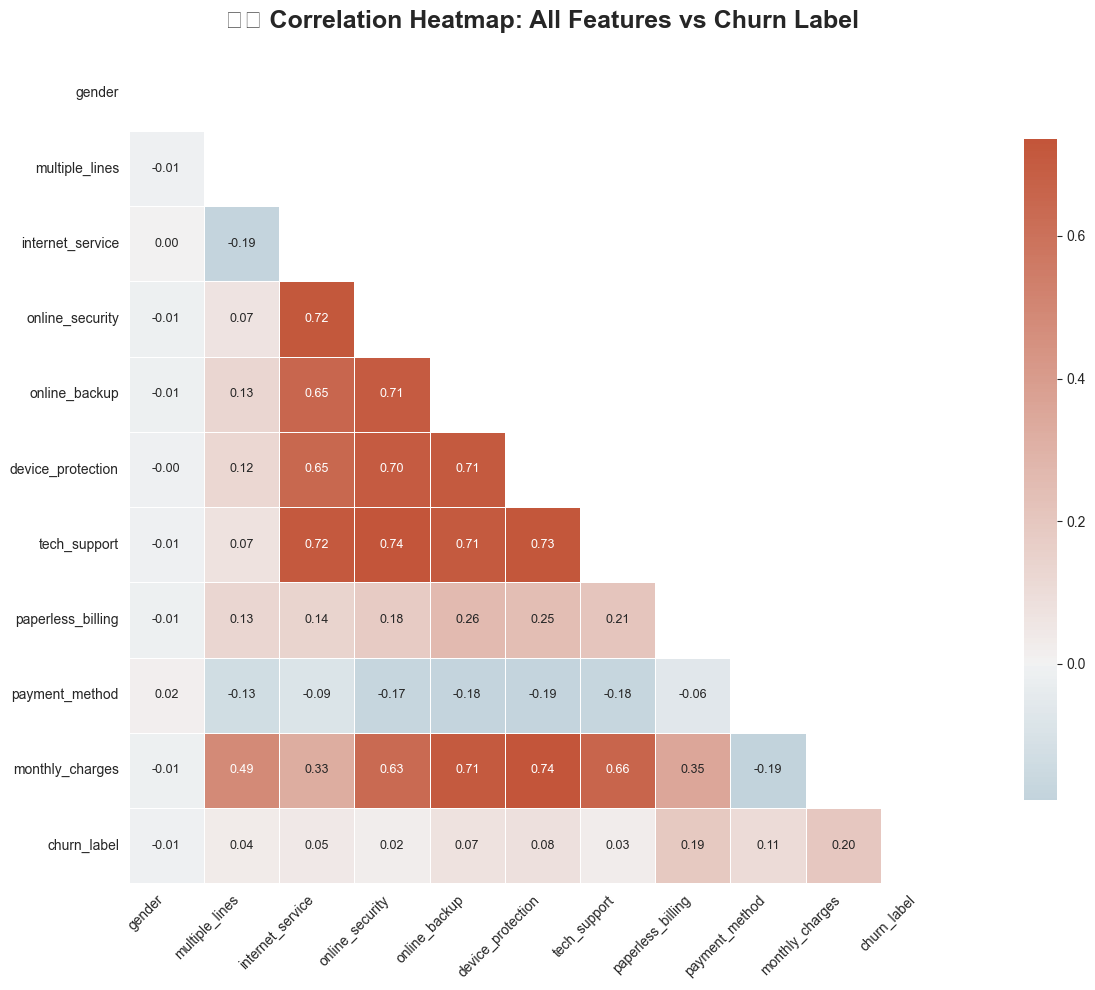

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 10))
sns.set_style("white")
corr_matrix=df.corr()
# Create a mask for the upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Define colormap and custom center
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 9}
)

plt.title('🌡️ Correlation Heatmap: All Features vs Churn Label', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [38]:
c=df.columns.tolist()
c

['gender',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'churn_label']

In [39]:
df.corr()

,gender,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,paperless_billing,payment_method,monthly_charges,churn_label
gender,1.000000,-0.009451,0.000863,-0.014418,-0.012230,-0.004720,-0.009409,-0.011754,0.017352,-0.014411,-0.008612
multiple_lines,-0.009451,1.000000,-0.186826,0.069085,0.130619,0.124502,0.069149,0.133255,-0.133346,0.489319,0.036310
internet_service,0.000863,-0.186826,1.000000,0.720587,0.650962,0.646159,0.716993,0.138625,-0.086140,0.326713,0.047291
online_security,-0.014418,0.069085,0.720587,1.000000,0.705166,0.701690,0.735191,0.184993,-0.170629,0.634556,0.023309
online_backup,-0.012230,0.130619,0.650962,0.705166,1.000000,0.711335,0.709216,0.260715,-0.181252,0.710142,0.074205
device_protection,-0.004720,0.124502,0.646159,0.701690,0.711335,1.000000,0.725327,0.246069,-0.187858,0.736756,0.084654
tech_support,-0.009409,0.069149,0.716993,0.735191,0.709216,0.725327,1.000000,0.211031,-0.175059,0.659597,0.027037
paperless_billing,-0.011754,0.133255,0.138625,0.184993,0.260715,0.246069,0.211031,1.000000,-0.062904,0.353393,0.191825
payment_method,0.017352,-0.133346,-0.086140,-0.170629,-0.181252,-0.187858,-0.175059,-0.062904,1.000000,-0.192113,0.107062
monthly_charges,-0.014411,0.489319,0.326713,0.634556,0.710142,0.736756,0.659597,0.353393,-0.192113,1.000000,0.196128


In [40]:
df=df.drop("gender",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   multiple_lines     7043 non-null   int64  
 1   internet_service   7043 non-null   int64  
 2   online_security    7043 non-null   int64  
 3   online_backup      7043 non-null   int64  
 4   device_protection  7043 non-null   int64  
 5   tech_support       7043 non-null   int64  
 6   paperless_billing  7043 non-null   int64  
 7   payment_method     7043 non-null   int64  
 8   monthly_charges    7043 non-null   float64
 9   churn_label        7043 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 550.4 KB


C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_11748\1672254187.py:31: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_11748\1672254187.py:31: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


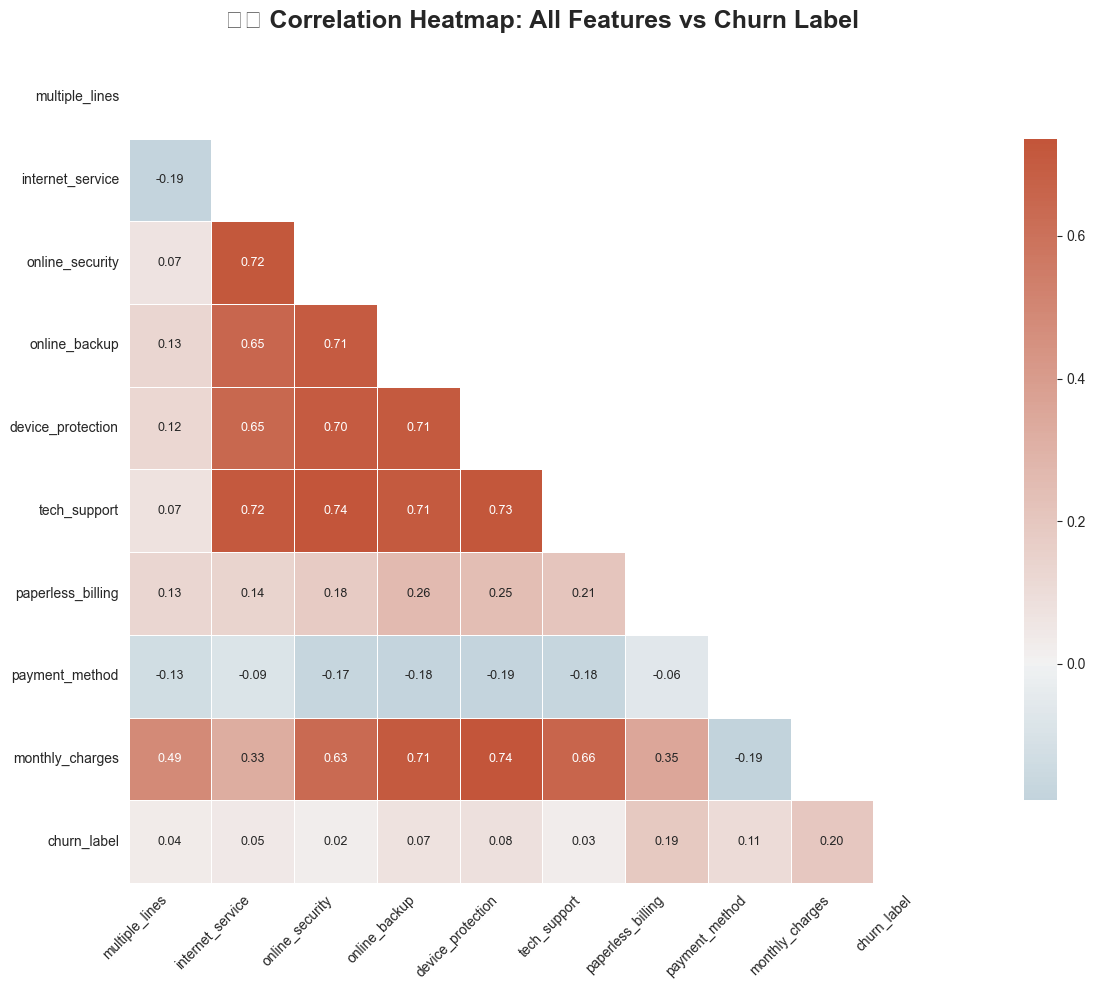

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 10))
sns.set_style("white")
corr_matrix=df.corr()
# Create a mask for the upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Define colormap and custom center
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 9}
)

plt.title('🌡️ Correlation Heatmap: All Features vs Churn Label', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [42]:
df=df.drop("payment_method",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   multiple_lines     7043 non-null   int64  
 1   internet_service   7043 non-null   int64  
 2   online_security    7043 non-null   int64  
 3   online_backup      7043 non-null   int64  
 4   device_protection  7043 non-null   int64  
 5   tech_support       7043 non-null   int64  
 6   paperless_billing  7043 non-null   int64  
 7   monthly_charges    7043 non-null   float64
 8   churn_label        7043 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 495.3 KB


C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_11748\1672254187.py:31: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Shaik Arshad\AppData\Local\Temp\ipykernel_11748\1672254187.py:31: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


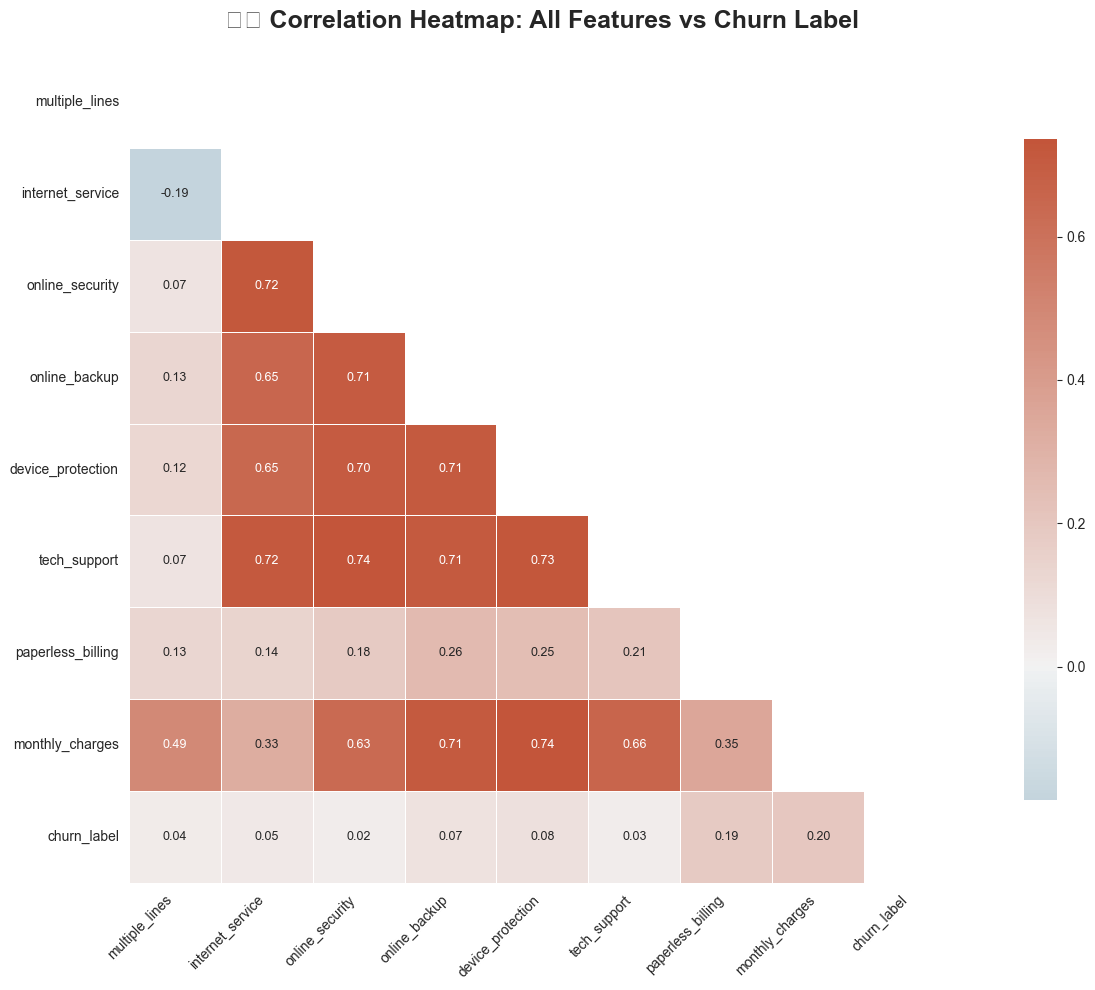

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 10))
sns.set_style("white")
corr_matrix=df.corr()
# Create a mask for the upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Define colormap and custom center
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 9}
)

plt.title('🌡️ Correlation Heatmap: All Features vs Churn Label', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

c:\Users\Shaik Arshad\anaconda3\envs\mychurnenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


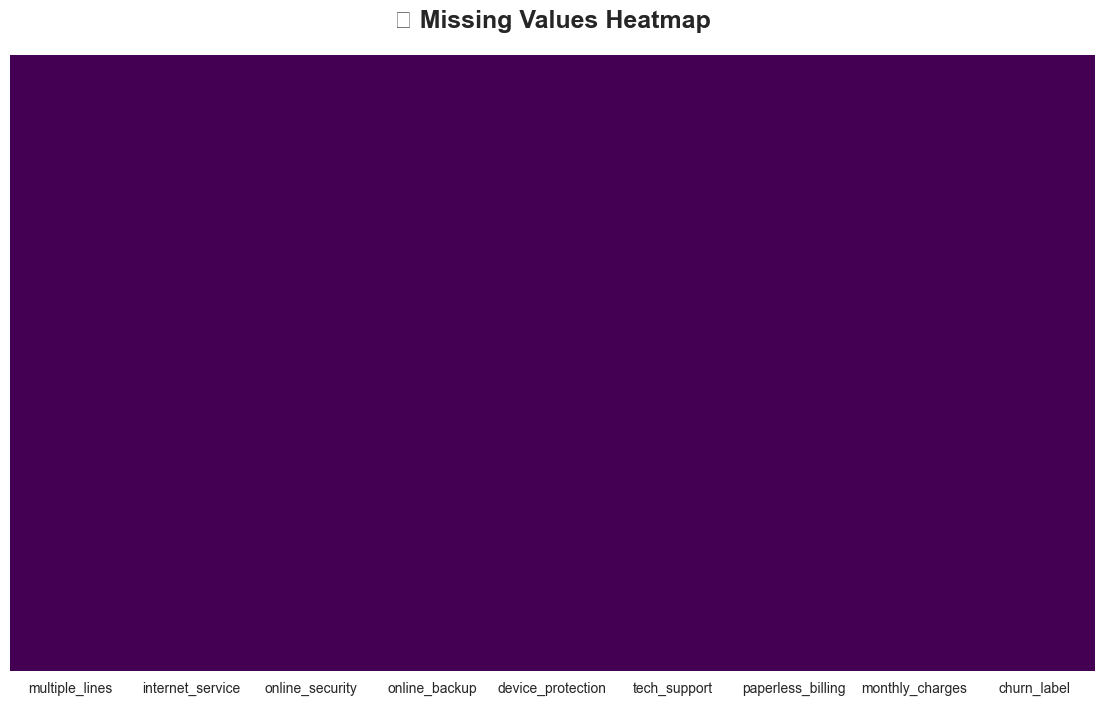

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap="viridis", 
            yticklabels=False)

plt.title("🔍 Missing Values Heatmap", fontsize=18, fontweight='bold', pad=20)
plt.show()


In [45]:
df.head()

,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,churn_label
0,1,2,2,2,1,1,1,53.85,1
1,1,1,1,1,1,1,1,70.70,1
2,2,1,1,1,2,1,1,99.65,1
3,2,1,1,1,2,2,1,104.80,1
4,2,1,1,2,2,1,1,103.70,1
